In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
heart_df = pd.read_csv("heart.csv")
heart_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
new_heart_df = heart_df.copy()

In [4]:
# EDA of heart_disease data 
new_heart_df.shape

(918, 12)

In [5]:
new_heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [6]:
heart_df.drop(heart_df.iloc[:, 2:5], axis=1, inplace=True)

In [7]:
new_heart_df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [8]:
# extract numerical columns
num_col = new_heart_df.select_dtypes(exclude=["O"]).columns

In [9]:
new_heart_df[num_col].head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,40,140,289,0,172,0.0,0
1,49,160,180,0,156,1.0,1
2,37,130,283,0,98,0.0,0
3,48,138,214,0,108,1.5,1
4,54,150,195,0,122,0.0,0


In [10]:
# extract categorical columns
cat_col = new_heart_df.select_dtypes(include=["O"]).columns

In [11]:
new_heart_df[cat_col].head()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up


In [12]:
def explore_data(df):
    print("DATA EXPLORATION")
    print(df.shape)
    print("STATISTICAL ANALYSIS OF NUMERIC DATA")
    print(df.describe().T)

In [13]:
explore_data(new_heart_df)

DATA EXPLORATION
(918, 12)
STATISTICAL ANALYSIS OF NUMERIC DATA
              count        mean         std   min     25%    50%    75%    max
Age           918.0   53.510893    9.432617  28.0   47.00   54.0   60.0   77.0
RestingBP     918.0  132.396514   18.514154   0.0  120.00  130.0  140.0  200.0
Cholesterol   918.0  198.799564  109.384145   0.0  173.25  223.0  267.0  603.0
FastingBS     918.0    0.233115    0.423046   0.0    0.00    0.0    0.0    1.0
MaxHR         918.0  136.809368   25.460334  60.0  120.00  138.0  156.0  202.0
Oldpeak       918.0    0.887364    1.066570  -2.6    0.00    0.6    1.5    6.2
HeartDisease  918.0    0.553377    0.497414   0.0    0.00    1.0    1.0    1.0


In [14]:
new_heart_df["ExerciseAngina"].unique()

array(['N', 'Y'], dtype=object)

In [15]:
new_heart_df[cat_col].nunique()

Sex               2
ChestPainType     4
RestingECG        3
ExerciseAngina    2
ST_Slope          3
dtype: int64

In [16]:
new_heart_df[num_col].nunique()

Age              50
RestingBP        67
Cholesterol     222
FastingBS         2
MaxHR           119
Oldpeak          53
HeartDisease      2
dtype: int64

In [17]:
new_heart_df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [18]:
data = new_heart_df.groupby("ExerciseAngina")["Age"].count()

In [19]:
data

ExerciseAngina
N    547
Y    371
Name: Age, dtype: int64

In [20]:
x_axis = list(data.index)
y_axis = list(data.values)

<BarContainer object of 2 artists>

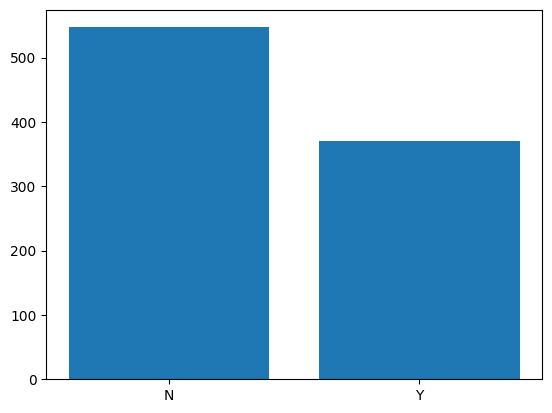

In [21]:
plt.bar(x_axis, y_axis)

<Axes: xlabel='Sex', ylabel='count'>

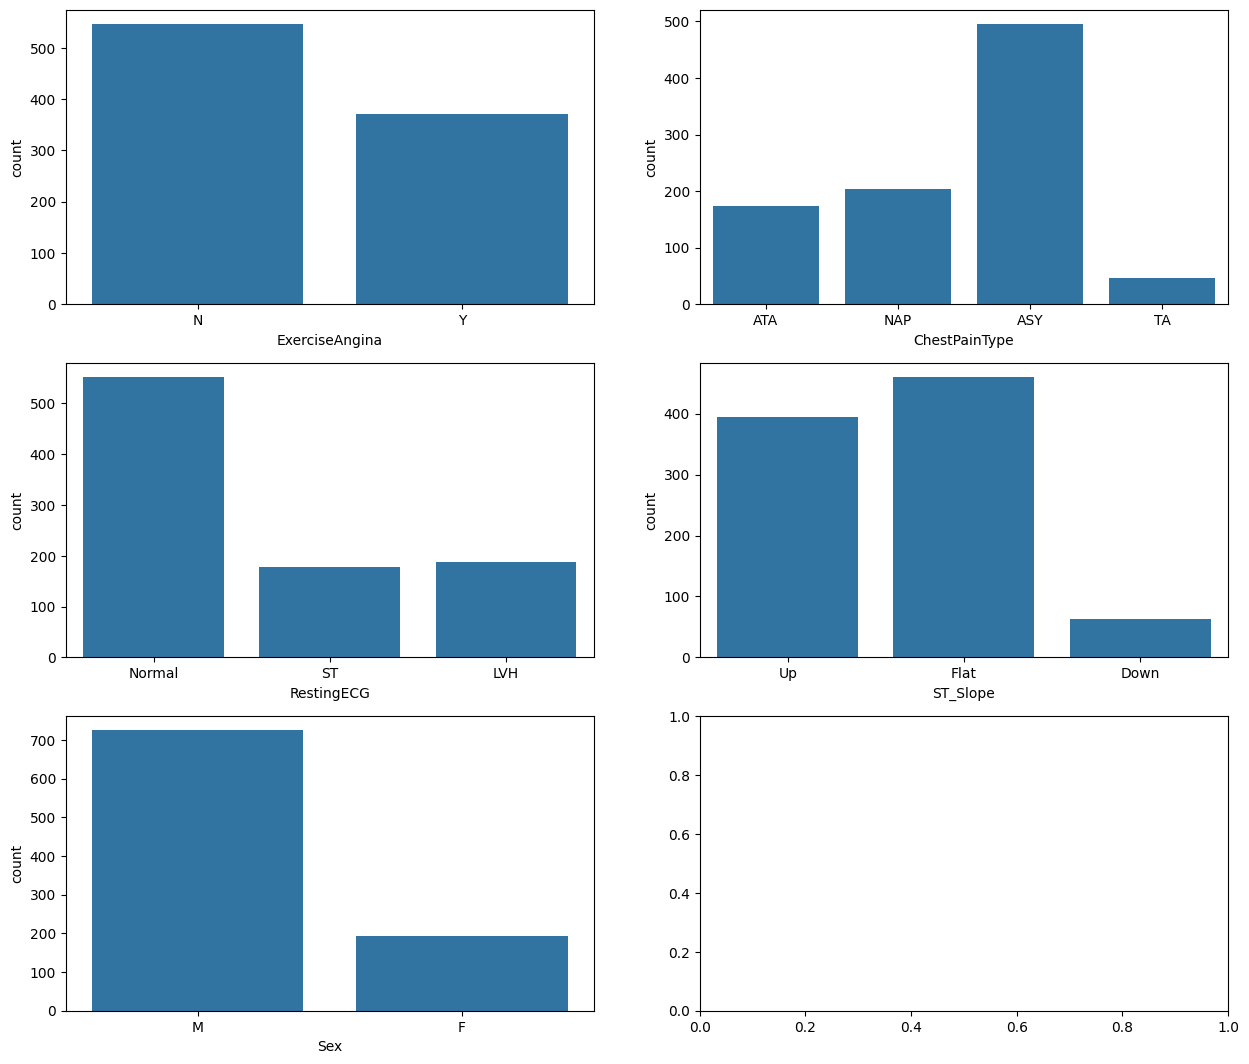

In [22]:
fig, axis = plt.subplots(3, 2, figsize=(15, 13))

sns.countplot(x="ExerciseAngina", data=new_heart_df, ax=axis[0, 0])
sns.countplot(x="ChestPainType", data=new_heart_df, ax=axis[0, 1])
sns.countplot(x="RestingECG", data=new_heart_df, ax=axis[1, 0])
sns.countplot(x="ST_Slope", data=new_heart_df, ax=axis[1, 1])
sns.countplot(x="Sex", data=new_heart_df, ax=axis[2, 0])

<Axes: xlabel='Sex', ylabel='Age'>

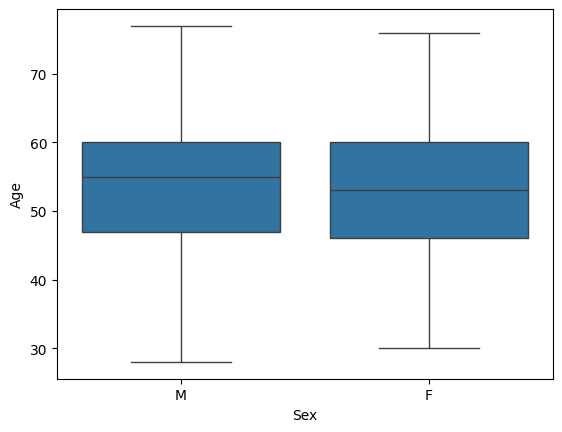

In [23]:
sns.boxplot(x="Sex", y="Age", data=new_heart_df)

In [24]:
numerical_columns = new_heart_df[num_col].head()

In [25]:
numerical_columns

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,40,140,289,0,172,0.0,0
1,49,160,180,0,156,1.0,1
2,37,130,283,0,98,0.0,0
3,48,138,214,0,108,1.5,1
4,54,150,195,0,122,0.0,0


In [26]:
numerical_columns.corr()["HeartDisease"].sort_values(ascending=False)

HeartDisease    1.000000
Oldpeak         0.968246
RestingBP       0.424579
Age             0.380920
MaxHR           0.023080
Cholesterol    -0.634875
FastingBS            NaN
Name: HeartDisease, dtype: float64

In [27]:
pd.get_dummies(new_heart_df["ChestPainType"], dtype=int)

,ASY,ATA,NAP,TA
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,0,1,0
...,...,...,...,...
913,0,0,0,1
914,1,0,0,0
915,1,0,0,0
916,0,1,0,0


In [28]:
new_heart_df = pd.get_dummies(new_heart_df, drop_first=True, dtype=float)

In [29]:
new_heart_df

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,49,160,180,0,156,1.0,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,37,130,283,0,98,0.0,0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,48,138,214,0,108,1.5,1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4,54,150,195,0,122,0.0,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
914,68,144,193,1,141,3.4,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
915,57,130,131,0,115,1.2,1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
916,57,130,236,0,174,0.0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [30]:
X = new_heart_df.drop("HeartDisease", axis=1).values
y = new_heart_df["HeartDisease"].values

In [31]:
new_heart_df.shape

(918, 16)

In [32]:
new_heart_df["HeartDisease"].unique()

array([0, 1], dtype=int64)

In [33]:
# count of each class
new_heart_df["HeartDisease"].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [36]:
np.random.seed(1)
np.random.randint(1, 100, 10)

array([38, 13, 73, 10, 76,  6, 80, 65, 17,  2])

In [37]:
scalar = StandardScaler()

X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)

In [38]:
svm_model = SVC()

In [39]:
svm_model.fit(X_train_scaled, y_train)
y_pred = svm_model.predict(X_test_scaled)

In [40]:
accuracy_score(y_test, y_pred)

0.8478260869565217

In [41]:
svm_model.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [42]:
svm_model = SVC()

In [43]:
# SVM

param = {
    "C": [0.1, 1, 10, 100, 1000],
    "gamma": [1, 0.1, 0.01, 0.001, 0.0001],
    "kernel": ["linear", "poly", "rbf"],
}

# GridSearchCV
grid_svc = GridSearchCV(estimator=svm_model, param_grid=param, cv=5)

In [44]:
grid_svc.fit(X_train_scaled, y_train)  # training the model

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'poly', 'rbf']})

In [45]:
best_params = grid_svc.best_params_

In [46]:
best_params

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [47]:
best_estimator = grid_svc.best_estimator_

In [48]:
best_estimator

SVC(C=10, gamma=0.01)

In [49]:
best_score = grid_svc.best_score_

In [50]:
best_score

0.8707485465116278

In [51]:
final_svm_model = SVC(C=10, gamma=0.01, kernel="rbf")

In [52]:
final_svm_model.fit(X_train_scaled, y_train)

SVC(C=10, gamma=0.01)

In [53]:
y_pred = final_svm_model.predict(X_test_scaled)

In [54]:
accuracy_score(y_test, y_pred)

0.855072463768116